<img alt="Ensemble Methods: Tuning a XGBoost model with Scikit-Learn | by Silvan  Miranda | Medium" class="n3VNCb" src="https://miro.medium.com/max/789/1*GliTGx-qIeW6JFJ4j8ZSBA.png" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 832px; height: 275.224px; margin: 0px;">

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
import sklearn.linear_model
import sklearn.neighbors
import sklearn.tree
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import shap
import matplotlib.pyplot as plt
import random

warnings.filterwarnings('ignore') # Removing warnings

> Can work on:
* Audi 
* Ford
* Bmw 
* Hyundi
* Merc
* Skoda
* Toyota

In [ ]:
# print(f'You choose :')
# comp = input()

comp = random.choice(['bmw', 'audi', 'ford', 'hyundi', 'skoda', 'toyota', 'merc']) # for now
comp

# Reading Data

In [ ]:
df = pd.read_csv(f"../input/used-car-dataset-ford-and-mercedes/{comp}.csv")
df.head()

## Placing Price Column At Last

In [ ]:
df = df[[ col for col in df.columns if col not in ['price','model']] + ['price']]
df.head()

# Pre-Processing class

In [ ]:
class Preprocessing(LabelEncoder):
    def __init__(self):
        self.params = {}

    def fit_transform(self, y):
        for column in y.columns:
            if y[column].dtype == 'O':
                self.params[column] = sorted(y[column].unique())
                y[column] = super().fit_transform(y[column])
                
        y = StandardScaler().fit_transform(y)
        return y
    
    def get_param(self, column):
        return self.params[column]

In [ ]:
prepross = Preprocessing()
y = df.iloc[:, -1]
df =  prepross.fit_transform(df.iloc[:,:-1])

# MODELs To Try

In [ ]:
clf_lr = sklearn.linear_model.LinearRegression()
clf_ridge = sklearn.linear_model.Ridge(alpha=.5)
clf_svr = sklearn.svm.SVR()
clf_sgd = sklearn.linear_model.SGDRegressor()
clf_knn = sklearn.neighbors.KNeighborsRegressor()
clf_dt = sklearn.tree.DecisionTreeRegressor()
clf_xg = xgboost.XGBRegressor(verbosity=0)

## Picking Best Model
- Using [CROSS_VALIDATE](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) to test data on various models

In [ ]:
for clf in [clf_lr, clf_ridge, clf_sgd, clf_svr, clf_knn, clf_dt, clf_xg]:
    if not isinstance(clf, type(xgboost.XGBRegressor())):
        print('\33[35m'+str(clf))
        scores = cross_validate(clf, df, y, cv=5)
        print('\33[32m'+str(scores['test_score'].sum()/0.05))
        print('\33[31m'+'-'*20)
    else :
        print('\33[5m'+'\33[35m'+str(clf))
        scores = cross_validate(clf, df, y, cv=5)
        print('\33[32m'+str(scores['test_score'].sum()/0.05))
        print('\33[31m'+'-'*20)

- <p style="color:black;font-size:20px;"><b>XGBOOST</b> is best in almost all the cases.</p> 
<p style="color:black;font-size:15px;">Using GridSearchCV to find the best parameters:</p>
<p style="color:black;font-size:15px;">Ran on 0 to 150 n_estimators, <b>58</b> was the best</p> 

In [ ]:
parameters = {'n_estimators':[58],
             'booster':['gbtree', 'gblinear', 'dart'], 'random_state': [0]}

clf = GridSearchCV(clf_xg, parameters)
clf.fit(df, y)
clf.best_params_

<p style="color:red;font-size:18px;">Using best estimator and calculating score.</p> 


In [ ]:
scores = cross_validate(clf.best_estimator_, df, y, cv=5)
print(str(scores['test_score'].sum()//0.05))

<p style="color:black;font-size:18px;">Year Transmission Mileage FuelType Tax Mpg EngineSize</p> 




In [ ]:
plt.figure(figsize=(20, 20))
xgboost.plot_importance(clf.best_estimator_)
plt.show()

<p style="color:black;font-size:15px;">After plotting importance graph, it is visible that:</p> 

- **FuelType**
- **Mileage**

<p style="color:black;font-size:15px;">are quantities responsible for their prices</p> 


# Thank You.

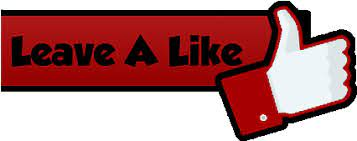